# Statistics of NMRlipids databank

This notebook plots:
1. Distributions of simulation lengths, number of atoms and trajectory sizes
2. Distribution of number of lipid components
3. Available single component bilayers and binary lipid mixtures
4. Pie diagram of temperatures

# Initializing databank

In [1]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import yaml
import pandas as pd
import seaborn as sns



sys.path.insert(1, '../BuildDatabank/')
from databankLibrary import download_link, lipids_dict, databank

path = '../../Data/Simulations/'
db_data = databank(path)
systems = db_data.get_systems()

# Plot distributions of simulation lengths, number of atoms and trajectory sizes

Number of entries:  289
Total size of trajectories:  832.1958036432043 Gb
Total time of trajectories:  147311.04 ns


Text(0, 0.5, 'Distribution')

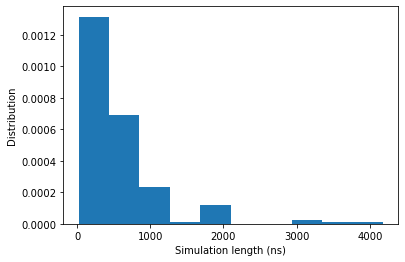

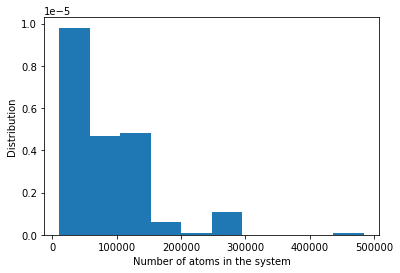

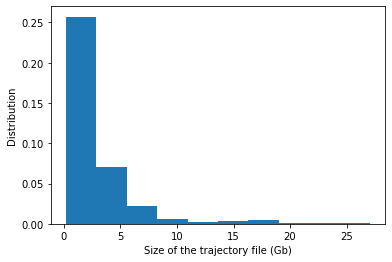

In [2]:
SimulationLengths = []
NumberOfAtoms = []
SizeOfTrajectories = []

# Loop over simulations in the Databank
for system in systems:
    SimulationLengths.append(system['TRJLENGTH']*0.001)
    NumberOfAtoms.append(system['NUMBER_OF_ATOMS'])
    SizeOfTrajectories.append(system['TRAJECTORY_SIZE']/(1024*1024*1024))
    
print("Number of entries: ",len(systems))
print("Total size of trajectories: ",str(np.sum(SizeOfTrajectories)) + ' Gb')
print("Total time of trajectories: ",str(np.sum(SimulationLengths)) + ' ns')

distSIMl = plt.hist(SimulationLengths, density=True)
plt.xlabel('Simulation length (ns)')
plt.ylabel('Distribution')
plt.figure()
distNatoms = plt.hist(NumberOfAtoms, density=True)
plt.xlabel('Number of atoms in the system')
plt.ylabel('Distribution')
plt.figure()
disttrjSIZE = plt.hist(SizeOfTrajectories, density=True)
plt.xlabel('Size of the trajectory file (Gb)')
plt.ylabel('Distribution')

# Plot distribution of number of lipid components

<Figure size 432x288 with 0 Axes>

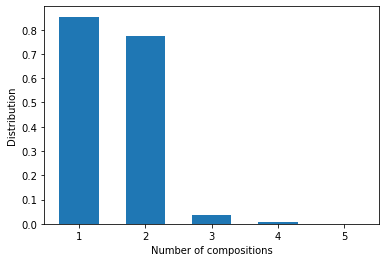

<Figure size 432x288 with 0 Axes>

In [3]:
Nlipids = []

# Loop over simulations in the Databank
for system in systems:
    NlipidsTMP = 0
    for molecule in system['COMPOSITION']:
        if molecule in lipids_dict:
            NlipidsTMP += 1
    Nlipids.append(NlipidsTMP)
    
bins=[0.7,1.3, 1.7,2.3, 2.7,3.3, 3.7,4.3, 4.7, 5.3]
distNlipids = plt.hist(Nlipids, density=True, range=[0,6], bins=bins)
plt.xlabel('Number of compositions')
plt.ylabel('Distribution')
plt.figure()

# Plot available single component bilayers and binary lipid mixtures

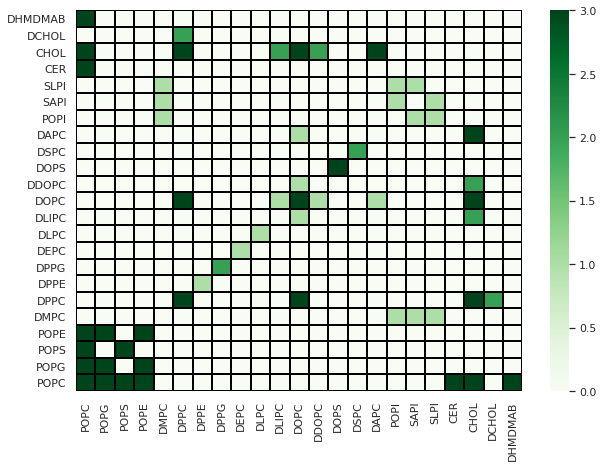

In [4]:
compositions = {}
for lipid in lipids_dict:
    compositions[lipid] = {}

for key in compositions:
    for lipid in lipids_dict:
        compositions[key][lipid] = 0


# Loop over simulations in the Databank
for system in systems:
    lipids_in_system = []
    for mol in system['COMPOSITION']:
        if mol in lipids_dict:
            lipids_in_system.append(mol)
    
    for lipid1 in lipids_in_system:
        for lipid2 in lipids_in_system:
            if lipid1 != lipid2:
                compositions[lipid1][lipid2] += 1
            #print(mol,system['COMPOSITION'][mol]['COUNT'])
            #compositions[mol] =
    
    if len(lipids_in_system) == 1:
        lipid = lipids_in_system[0]
        compositions[lipid][lipid] += 1

df = pd.DataFrame(compositions)
z=df.values

sns.set(rc = {'figure.figsize':(10,7)})
ax = sns.heatmap(df, cmap = 'Greens', vmin =0, vmax = 3, linewidths = 1, linecolor = 'black')
ax.invert_yaxis()

# Plotting pie diagram of temperatures

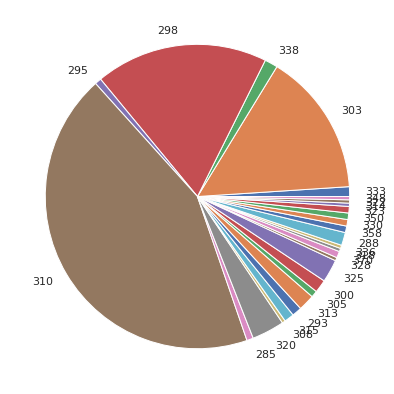

In [5]:
#db_data.pie_temperature()
import collections
temps = [ int(float(system['TEMPERATURE'])) for system in systems]
counter = collections.Counter(temps)
plt.pie(counter.values(),labels=counter.keys());